<a href="https://colab.research.google.com/github/Pooja123667/Smart_Tendering_ML/blob/main/Smart_Tender_system_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing necessary Libraries <br>
**1. Understanding and Analyzing the Dataset**

In [138]:
import pandas as pd
import io 
print("Import success")

Import success


In [139]:
df = pd.read_csv("https://raw.githubusercontent.com/Pooja123667/Smart_Tendering_ML/main/FY19_BID_Trends_Report_Data%20(3).csv", low_memory=False) 

In [140]:
df.head(1)

,index,company name,Floor Size,Full-time staff,Sanitation staff employed,Safety Inspector,Part-time staff,Current clients,Bid provides supplemental sanitation services,Types of duties assigned to sanitation workers,Days per week of sanitation services,Hours logged by sanitation workers,Incidents of graffiti removed,Trash bags collected,Trash and recycling receptacles serviced,Bid provides supplemental public safety services,Duties assigned to public safety personnel,Hours logged by public safety officers,Interactions with public safety officers,Bid provides supplemental streetscape and beautification services,Planters and hanging baskets maintained,Tree pits maintained,Banners maintained,Public art installations sponsored,Street furniture elements maintained,Wayfinding elements maintained,Lighting elements maintained,Other infrastructure elements maintained,Public spaces maintained,Bid has holiday lighting program,Communication channels used,Social media followers,Marketing materials distributed,Public events coordinated,Estimated attendees to public events coordinated,Special event charges,Miscellaneous charges,Sanitation expenses,Public safety expenses,"Marketing, holiday lighting, and special event expenses",Streetscape & beautification expenses,Salaries,Outside contractor expenses,Insurance costs,Rent and utilities,Supplies and equipment costs,Other G&A expenses
0,1,Moreno LLC,5220,1,31,9,9,145,Yes,Street Sweeping and Bagging; Snow and Ice Remo...,7.0,61051,19327,70352,282,No,NaN,24732.0,NaN,Yes,341,115,105,12,2304,828,2161,786,19.0,Yes,Direct mailings; Flyers; Email bulletins; Soci...,11716,40108,15,198647,"$360,146","$16,591","$76,277","$40,756","$177,762","$39,202","$194,141","$101,399","$2,035","$12,296","$3,749","$46,053"


In [141]:
df.shape

(99998, 47)

In [142]:
df.describe()

,index,Floor Size,Sanitation staff employed,Safety Inspector,Part-time staff,Days per week of sanitation services,Hours logged by sanitation workers,Trash bags collected,Trash and recycling receptacles serviced,Hours logged by public safety officers,Interactions with public safety officers,Planters and hanging baskets maintained,Tree pits maintained,Banners maintained,Public art installations sponsored,Public spaces maintained,Social media followers,Marketing materials distributed,Public events coordinated,Estimated attendees to public events coordinated
count,99998.000000,99998.000000,99998.000000,99998.000000,99998.000000,99995.000000,99998.000000,99998.000000,99998.000000,99977.000000,99975.000000,99998.000000,99998.000000,99998.000000,99998.000000,99979.000000,99998.000000,99998.000000,99998.000000,99998.000000
mean,49999.500000,61755.605142,42.907308,29.535351,12.499660,6.003140,85669.002950,142766.823606,211.609982,62760.451244,61370.549277,302.081422,241.783326,111.564451,14.471079,40.542234,44420.992340,62573.656453,199.659643,101390.907458
std,28867.080446,34590.375339,23.981272,16.719123,6.908006,0.816817,45983.026817,67505.798946,115.988623,34819.947090,33829.700017,152.755137,133.739679,58.339718,5.195601,23.053779,25828.933257,36123.206297,107.492979,57102.558881
min,1.000000,1740.000000,2.000000,1.000000,1.000000,1.000000,6103.000000,26001.000000,11.000000,2202.000000,2762.000000,40.000000,11.000000,11.000000,6.000000,0.000000,11.000000,112.000000,14.000000,2501.000000
25%,25000.250000,31832.750000,22.000000,15.000000,7.000000,5.000000,45686.000000,84596.250000,111.000000,32703.000000,32137.000000,169.000000,126.000000,61.000000,10.000000,21.000000,22090.000000,31224.250000,107.000000,51787.000000
50%,49999.500000,61744.500000,43.000000,30.000000,13.000000,6.000000,85695.000000,142526.000000,212.000000,62722.000000,61365.000000,302.000000,242.000000,111.000000,14.000000,41.000000,44284.000000,62480.000000,199.000000,101619.500000
75%,74998.750000,91648.500000,64.000000,44.000000,18.000000,7.000000,125625.000000,201038.250000,313.000000,92996.000000,90682.500000,435.000000,358.000000,162.000000,19.000000,60.000000,66683.000000,93681.000000,292.000000,150867.500000
max,99998.000000,121820.000000,84.000000,58.000000,24.000000,7.000000,165099.000000,259996.000000,411.000000,122998.000000,119999.000000,566.000000,472.000000,212.000000,23.000000,80.000000,787253.000000,125436.000000,386.000000,200000.000000


In [ ]:
df.info()

Columns J, Q and AE did not contain any values after 75, using python to fill in values


In [144]:
#working on columns Types of duties assigned to sanitation workers, Communication channels used, Duties assigned to public safety personnel
#df['Types of duties assigned to sanitation workers']
import random
for i in range(75, 99998):
  df['Types of duties assigned to sanitation workers'][i] = df['Types of duties assigned to sanitation workers'][random.randrange(0,74)]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [145]:
df['Types of duties assigned to sanitation workers'][90000]

'Street Sweeping and Bagging; Snow and Ice Removal; Graffiti Removal'

In [146]:
for i in range(75, 99998):
  df['Duties assigned to public safety personnel'][i] = df['Duties assigned to public safety personnel'][random.randrange(0,74)]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [147]:
df['Duties assigned to public safety personnel'][3000]

'Street patrol; Coordination with NYPD'

In [148]:
for i in range(75, 99998):
  df['Communication channels used'][i] = df['Communication channels used'][random.randrange(0,74)]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [149]:
df['Communication channels used'][90000]

'Digital advertising (i.e. Google, Facebook, Instagram ads); Direct mailings; Flyers; Email bulletins; Social media'

In [163]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99998 entries, 0 to 99997
Data columns (total 44 columns):
 #   Column                                                             Non-Null Count  Dtype  
---  ------                                                             --------------  -----  
 0   index                                                              99998 non-null  int64  
 1   company name                                                       99998 non-null  object 
 2   Floor Size                                                         99998 non-null  int64  
 3   Full-time staff                                                    99998 non-null  object 
 4   Sanitation staff employed                                          99998 non-null  int64  
 5   Safety Inspector                                                   99998 non-null  int64  
 6   Part-time staff                                                    99998 non-null  int64  
 7   Current clients       

In [160]:
#Dropping unnecessary columns
df.drop(['Marketing, holiday lighting, and special event expenses','Rent and utilities','Other G&A expenses'], axis=1, inplace=True)

In [162]:
df.shape

(99998, 44)

Now we shall replace all "$" signs in the columns to a null value

In [174]:
#replace function for replacing all "$" sign to " " for the following - 

#Miscellaneous charges
#Public safety expenses
#Streetscape & beautification expenses
#Salaries
#Outside contractor expenses
#Insurance costs
#Supplies and equipment costs
#Sanitation expenses


df['Special event charges'] = df['Special event charges'].str.replace("$","")
df['Miscellaneous charges'] = df['Miscellaneous charges'].str.replace("$","")
df['Sanitation expenses'] = df['Sanitation expenses'].str.replace("$","")
df['Public safety expenses'] = df['Public safety expenses'].str.replace("$","")
df['Streetscape & beautification expenses'] = df['Streetscape & beautification expenses'].str.replace("$","")
df['Salaries'] = df['Salaries'].str.replace("$","")
df['Outside contractor expenses'] = df['Outside contractor expenses'].str.replace("$","")
df['Insurance costs'] = df['Insurance costs'].str.replace("$","")
df['Supplies and equipment costs'] = df['Supplies and equipment costs'].str.replace("$","")




In [175]:
#Dropping unnecessary columns
df.head(1)

,index,company name,Floor Size,Full-time staff,Sanitation staff employed,Safety Inspector,Part-time staff,Current clients,Bid provides supplemental sanitation services,Types of duties assigned to sanitation workers,Days per week of sanitation services,Hours logged by sanitation workers,Incidents of graffiti removed,Trash bags collected,Trash and recycling receptacles serviced,Bid provides supplemental public safety services,Duties assigned to public safety personnel,Hours logged by public safety officers,Interactions with public safety officers,Bid provides supplemental streetscape and beautification services,Planters and hanging baskets maintained,Tree pits maintained,Banners maintained,Public art installations sponsored,Street furniture elements maintained,Wayfinding elements maintained,Lighting elements maintained,Other infrastructure elements maintained,Public spaces maintained,Bid has holiday lighting program,Communication channels used,Social media followers,Marketing materials distributed,Public events coordinated,Estimated attendees to public events coordinated,Special event charges,Miscellaneous charges,Sanitation expenses,Public safety expenses,Streetscape & beautification expenses,Salaries,Outside contractor expenses,Insurance costs,Supplies and equipment costs
0,1,Moreno LLC,5220,1,31,9,9,145,Yes,Street Sweeping and Bagging; Snow and Ice Remo...,7.0,61051,19327,70352,282,No,NaN,24732.0,NaN,Yes,341,115,105,12,2304,828,2161,786,19.0,Yes,Direct mailings; Flyers; Email bulletins; Soci...,11716,40108,15,198647,"360,146","16,591","76,277","40,756","39,202","194,141","101,399","2,035","3,749"


In [176]:
df.shape

(99998, 44)

In [ ]:
df.head(1)

Replacing all "," by "" and all NaN values by 0<br>
Would be required for adding the total sum later

In [190]:

df['Miscellaneous charges'] = df['Miscellaneous charges'].str.replace(",","").fillna("0")
df['Sanitation expenses'] = df['Sanitation expenses'].str.replace(",","").fillna("0")
df['Public safety expenses'] = df['Public safety expenses'].str.replace(",","").fillna("0")
df['Streetscape & beautification expenses'] = df['Streetscape & beautification expenses'].str.replace(",","").fillna("0")
df['Salaries'] = df['Salaries'].str.replace(",","").fillna("0")
df['Outside contractor expenses'] = df['Outside contractor expenses'].str.replace(",","").fillna("0")
df['Insurance costs'] = df['Insurance costs'].str.replace(",","").fillna("0")
df['Supplies and equipment costs'] = df['Supplies and equipment costs'].str.replace(",","").fillna("0")

In [ ]:
df['Miscellaneous charges']

In [ ]:
df['Public safety expenses']

In [ ]:
df['Total Quotation'] = df['Miscellaneous charges'].astype("int") + df['Public safety expenses'].astype("int") +  df['Sanitation expenses'].astype("int") + df['Streetscape & beautification expenses'].astype("int") 
+ df['Salaries'].astype("int") + df['Outside contractor expenses'].astype("int") + df['Insurance costs'].astype("int") +  df['Supplies and equipment costs'].astype("int")
df['Total Quotation']
#Streetscape & beautification expenses   Outside contractor expenses     


In [199]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99998 entries, 0 to 99997
Data columns (total 46 columns):
 #   Column                                                             Non-Null Count  Dtype  
---  ------                                                             --------------  -----  
 0   index                                                              99998 non-null  int64  
 1   company name                                                       99998 non-null  object 
 2   Floor Size                                                         99998 non-null  int64  
 3   Full-time staff                                                    99998 non-null  object 
 4   Sanitation staff employed                                          99998 non-null  int64  
 5   Safety Inspector                                                   99998 non-null  int64  
 6   Part-time staff                                                    99998 non-null  int64  
 7   Current clients       

Removing unnecessary attributes and merging some attributes

In [204]:
df.drop(['Types of duties assigned to sanitation workers','Duties assigned to public safety personnel'],axis=1,inplace=True)

In [206]:
df['Incidents of graffiti removed'] = df['Incidents of graffiti removed'].str.replace(",","")
df['Incidents of graffiti removed'] = df['Incidents of graffiti removed'].str.replace("-","0")
df['Incidents of graffiti removed'] = df['Incidents of graffiti removed'].fillna("0")

In [209]:
df['Number_Of_Sanitation_Activities'] = df['Incidents of graffiti removed'].astype("float") + df['Trash bags collected'] + df['Trash and recycling receptacles serviced']

In [210]:
df.drop(['Incidents of graffiti removed','Trash bags collected','Trash and recycling receptacles serviced'],axis=1,inplace=True)

In [225]:
df['Street furniture elements maintained'] = df['Street furniture elements maintained'].fillna("0")
df['Wayfinding elements maintained'] = df['Wayfinding elements maintained'].fillna("0")
df['Lighting elements maintained'] = df['Lighting elements maintained'].fillna("0")
df['Other infrastructure elements maintained'] = df['Other infrastructure elements maintained'].fillna("0")


In [ ]:
df.dtypes

In [ ]:
df['Beautification_Activities'] = df['Planters and hanging baskets maintained'] + df['Tree pits maintained'] + df['Banners maintained'] + df['Public art installations sponsored'] 
+ df['Street furniture elements maintained']
+ df['Wayfinding elements maintained']
+ df['Lighting elements maintained']
+ df['Public spaces maintained']

df['Beautification_Activities']

In [230]:
df.drop(['Planters and hanging baskets maintained','Tree pits maintained','Banners maintained','Public art installations sponsored','Street furniture elements maintained','Wayfinding elements maintained','Lighting elements maintained','Other infrastructure elements maintained','Public spaces maintained'],axis=1,inplace=True)

In [235]:
df.shape

(99998, 30)

In [232]:
df['Beautification_Activities'].isnull()

0        False
1        False
2        False
3        False
4        False
         ...  
99993    False
99994    False
99995    False
99996    False
99997    False
Name: Beautification_Activities, Length: 99998, dtype: bool

In [233]:
df['Media_Reach'] = df['Social media followers'] + df['Marketing materials distributed'] + (df['Public events coordinated']*df['Estimated attendees to public events coordinated']) 

In [234]:
df.drop(['Social media followers','Marketing materials distributed','Public events coordinated','Estimated attendees to public events coordinated'],axis=1,inplace=True)

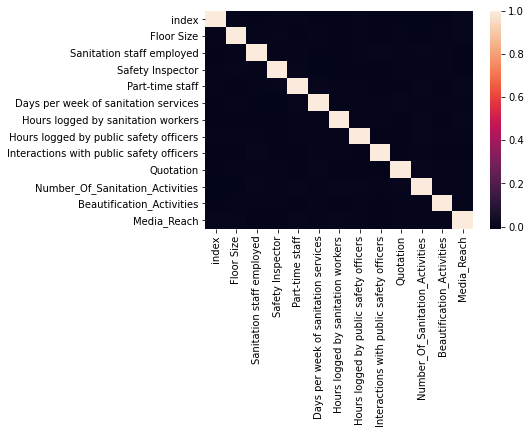

In [237]:
import seaborn as sns
a = df.corr()
sns.heatmap(a)

**2. EDA - Explolatory Data Analysis**